<a href="https://colab.research.google.com/github/ismail-hasan-tanjer/house-price-prediction/blob/main/House_Price_Prediction_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicted vs Residuals Scatter Plot**
**You can plot the residuals against the predicted values to see if there is a pattern.**

# **Predicted vs Residuals Scatter Plot**
**You can plot the residuals against the predicted values to see if there is a pattern.**

# **Predicted vs Residuals Scatter Plot**
**You can plot the residuals against the predicted values to see if there is a pattern.**

In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
import pandas as pd

df = pd.read_csv("housing.csv")
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('housing.csv')

# Basic info
print(df.head())

# Handle missing values first
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

# Feature Engineering
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

# One-hot encoding for 'ocean_proximity'
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

features = ['median_income', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household']
df[features] = scaler.fit_transform(df[features])

# Target and features
X = df[features]
y = df['median_house_value']

# Train a model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
Mean Squared Error: 8075960571.10


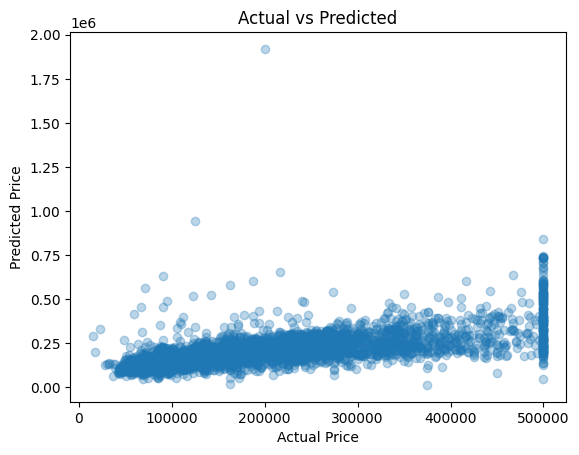

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted")
plt.show()


In [ ]:
pip install xgboost


**4 models (Decision Tree, Random Forest, Gradient Boosting, XGBoost) have been trained and evaluated,**

**Model performance (MSE) has been printed.**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# models dictionary
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42, eval_metric='rmse')
}

# Train & Evaluate loop
for name, model in models.items():
    model.fit(X_train, y_train)       # X_train, y_train
    y_pred = model.predict(X_test)    # X_test, y_test
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} Mean Squared Error: {mse:.2f}")


Decision Tree Mean Squared Error: 9457849992.93
Random Forest Mean Squared Error: 5283800645.32
Gradient Boosting Mean Squared Error: 5328060298.32
XGBoost Mean Squared Error: 5948404054.23


# **Actual vs Predicted Plot**

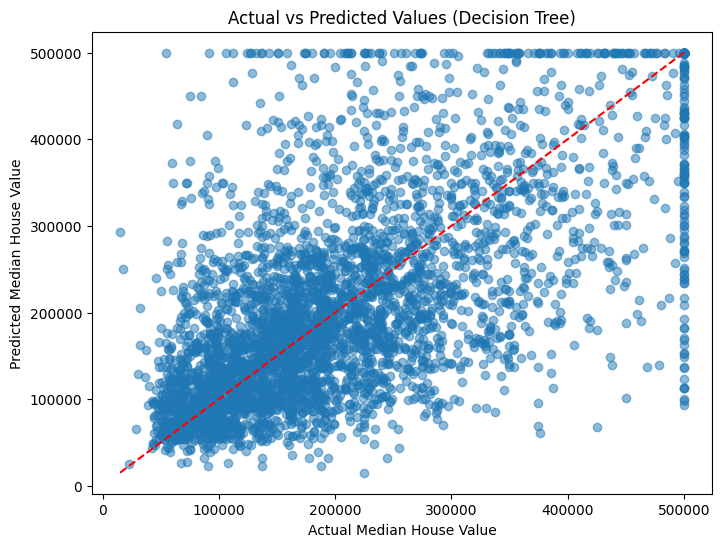

In [ ]:
import matplotlib.pyplot as plt

def plot_actual_vs_predicted(y_test, y_pred, model_name):
    plt.figure(figsize=(8,6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
    plt.xlabel('Actual Median House Value')
    plt.ylabel('Predicted Median House Value')
    plt.title(f'Actual vs Predicted Values ({model_name})')
    plt.show()

# Example for Decision Tree
plot_actual_vs_predicted(y_test, models['Decision Tree'].predict(X_test), 'Decision Tree')


# **Residual Plot**

**To see Error or Residual, which is the difference between Actual and Predicted.**

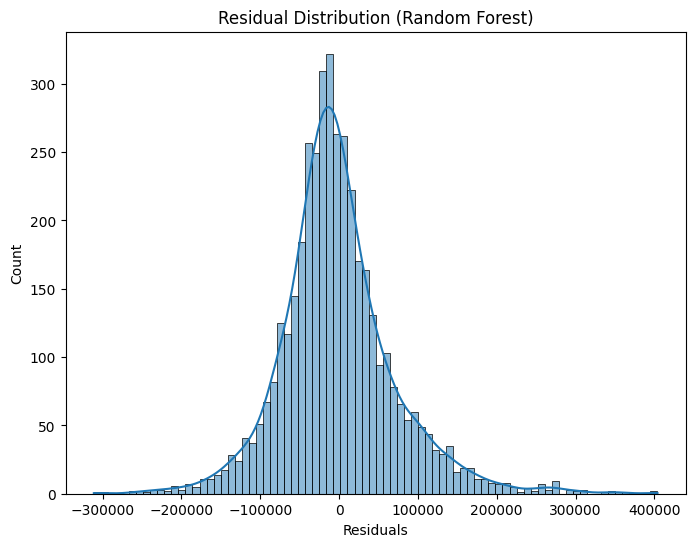

In [ ]:
import seaborn as sns

def plot_residuals(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(8,6))
    sns.histplot(residuals, kde=True)
    plt.title(f'Residual Distribution ({model_name})')
    plt.xlabel('Residuals')
    plt.show()

#Example for Random Forest
plot_residuals(y_test, models['Random Forest'].predict(X_test), 'Random Forest')


# **Predicted vs Residuals Scatter Plot**
**You can plot the residuals against the predicted values to see if there is a pattern.**

In [ ]:
def plot_predicted_vs_residuals(y_pred, residuals, model_name):
    plt.figure(figsize=(8,6))
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'Predicted vs Residuals ({model_name})')
    plt.show()

# Example: Gradient Boosting
y_pred_gb = models['Gradient Boosting'].predict(X_test)
residuals_gb = y_test - y_pred_gb
plot_predicted_vs_residuals(y_pred_gb, residuals_gb, 'Gradient Boosting')